In [42]:
import numpy as np
import pandas as pd
import sklearn.feature_extraction.text as fe
import nltk

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [8.0, 6.0]

### Get Data

In [4]:
# download gutenberg corpus
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     /media/wintermute/data/nltk...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [5]:
# list available books
books = nltk.corpus.gutenberg.fileids()
names = [s.split('.')[0] for s in books]
names

['austen-emma',
 'austen-persuasion',
 'austen-sense',
 'bible-kjv',
 'blake-poems',
 'bryant-stories',
 'burgess-busterbrown',
 'carroll-alice',
 'chesterton-ball',
 'chesterton-brown',
 'chesterton-thursday',
 'edgeworth-parents',
 'melville-moby_dick',
 'milton-paradise',
 'shakespeare-caesar',
 'shakespeare-hamlet',
 'shakespeare-macbeth',
 'whitman-leaves']

In [6]:
# get text of all books (corpus)
text = [nltk.corpus.gutenberg.open(f).read() for f in books]
print(text[12][117:443])

The pale Usher--threadbare in coat, heart, body, and brain; I see him
now.  He was ever dusting his old lexicons and grammars, with a queer
handkerchief, mockingly embellished with all the gay flags of all the
known nations of the world.  He loved to dust his old grammars; it
somehow mildly reminded him of his mortality.


In [7]:
# get basic info about each text
length = np.array([len(x) for x in text])
info = pd.DataFrame({'name': names, 'length': length})
info

,name,length
0,austen-emma,887071
1,austen-persuasion,466292
2,austen-sense,673022
3,bible-kjv,4332554
4,blake-poems,38153
5,bryant-stories,249439
6,burgess-busterbrown,84663
7,carroll-alice,144395
8,chesterton-ball,457450
9,chesterton-brown,406629


### Vectorize Corpus

In [8]:
vec_count = fe.CountVectorizer()
count = vec_count.fit_transform(text)
ndoc, ntok = count.shape
print(f'ndoc = {ndoc}')
print(f'ntok = {ntok}')

ndoc = 18
ntok = 42063


In [9]:
vec_freq = fe.TfidfVectorizer(use_idf=False, norm='l1')
freq = vec_freq.fit_transform(text)

In [10]:
vec_tfidf = fe.TfidfVectorizer()
tfidf = vec_tfidf.fit_transform(text)

### Similarity Matrix

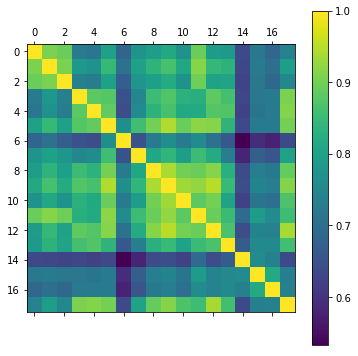

In [11]:
simil = (tfidf*tfidf.T).toarray()
plt.matshow(simil);
plt.colorbar();

In [12]:
sim_sort = simil.argsort() # sort the similarity matrix horizontally
close = sim_sort[:, -2] # closest other than the book itself
sim_close = simil[range(len(books)), close] # get actual similarity value
df_close = pd.DataFrame({'name': books, 'id_close': close, 'sim_close': sim_close})
df_close = df_close.join(info['name'], on='id_close', rsuffix='_close') # get name of closest
df_close

,name,id_close,sim_close,name_close
0,austen-emma.txt,1,0.907119,austen-persuasion
1,austen-persuasion.txt,11,0.915382,edgeworth-parents
2,austen-sense.txt,1,0.908412,austen-persuasion
3,bible-kjv.txt,17,0.907778,whitman-leaves
4,blake-poems.txt,17,0.913517,whitman-leaves
5,bryant-stories.txt,9,0.943385,chesterton-brown
6,burgess-busterbrown.txt,5,0.764887,bryant-stories
7,carroll-alice.txt,5,0.857163,bryant-stories
8,chesterton-ball.txt,9,0.940164,chesterton-brown
9,chesterton-brown.txt,12,0.950602,melville-moby_dick


### Word Usage

In [13]:
usage = (count > 0).astype(np.int)
vocab = usage.sum(axis=1).getA1()
diver = (freq.power(2)).sum(axis=1).getA1()
comp = vocab/np.sqrt(length)
pd.DataFrame({'name': books, 'vocab': vocab, 'complex': comp, 'diversity': diver})

,name,vocab,complex,diversity
0,austen-emma.txt,7239,7.685982,0.007758
1,austen-persuasion.txt,5755,8.427841,0.008517
2,austen-sense.txt,6315,7.697660,0.008081
3,bible-kjv.txt,12731,6.116325,0.015182
4,blake-poems.txt,1507,7.715231,0.010381
5,bryant-stories.txt,3888,7.784739,0.012387
6,burgess-busterbrown.txt,1525,5.241107,0.009900
7,carroll-alice.txt,2559,6.734327,0.010446
8,chesterton-ball.txt,8247,12.193382,0.009421
9,chesterton-brown.txt,7723,12.111191,0.009846


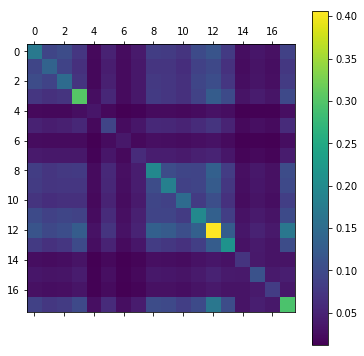

In [14]:
overlap = (usage*usage.T).toarray()/ntok
plt.matshow(overlap);
plt.colorbar();

In [15]:
pub_year = {
    'austen-emma': 1816,
    'austen-persuasion': 1818,
    'austen-sense': 1811,
    'bible-kjv': 1611,
    'blake-poems': 1789,
    'bryant-stories': 1918,
    'burgess-busterbrown': 1920,
    'carroll-alice': 1865,
    'chesterton-ball': 1909,
    'chesterton-brown': 1914,
    'chesterton-thursday': 1908,
    'edgeworth-parents': 1796,
    'melville-moby_dick': 1851,
    'milton-paradise': 1667,
    'shakespeare-caesar': 1599,
    'shakespeare-hamlet': 1599,
    'shakespeare-macbeth': 1603,
    'whitman-leaves': 1855
}
years = np.array([pub_year[x] for x in names])

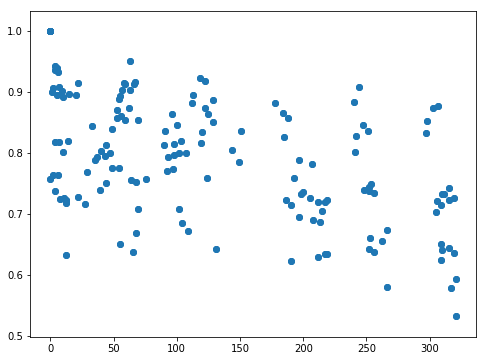

In [16]:
year_diff = np.abs(years[:,None]-years[None,:]).flatten()
sim_flat = simil.flatten()
plt.scatter(year_diff, sim_flat);

### Clustering

In [17]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [40]:
n_clust = 4
clust = KMeans(n_clusters=n_clust).fit_predict(tfidf)
df_clust = info.assign(clust=clust).sort_values(by=['clust', 'name'])
df_clust

,name,length,clust
3,bible-kjv,4332554,0
4,blake-poems,38153,0
5,bryant-stories,249439,0
7,carroll-alice,144395,0
8,chesterton-ball,457450,0
9,chesterton-brown,406629,0
10,chesterton-thursday,320525,0
12,melville-moby_dick,1242990,0
13,milton-paradise,468220,0
17,whitman-leaves,711215,0


### Inaugurals

In [44]:
nltk.download('inaugural')

[nltk_data] Downloading package inaugural to
[nltk_data]     /media/wintermute/data/nltk...
[nltk_data]   Unzipping corpora/inaugural.zip.


True

In [109]:
pres = nltk.corpus.inaugural.fileids()
inaug = [nltk.corpus.inaugural.open(f).read() for f in pres]
inaug_years = np.array([int(s.split('-')[0]) for s in pres])
inaug_length = np.array([len(s) for s in inaug])

In [72]:
vec_count = fe.CountVectorizer()
inaug_count = vec_count.fit_transform(inaug)
inaug_ndoc, inaug_ntok = inaug_count.shape
print(f'ndoc = {inaug_ndoc}')
print(f'ntok = {inaug_ntok}')

ndoc = 58
ntok = 9168


In [74]:
vec_freq = fe.TfidfVectorizer(use_idf=False, norm='l1')
inaug_freq = vec_freq.fit_transform(inaug)

In [48]:
vec_tfidf = fe.TfidfVectorizer()
inaug_tfidf = vec_tfidf.fit_transform(inaug)

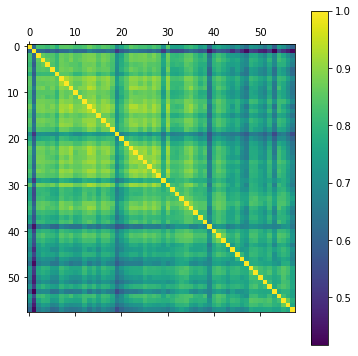

In [54]:
inaug_simil = (inaug_tfidf*inaug_tfidf.T).toarray()
plt.matshow(inaug_simil);
plt.colorbar();

In [128]:
# what's up with washington's second inaugural? it's just super chill
print(inaug[1].strip())

Fellow citizens, I am again called upon by the voice of my country to execute the functions of its Chief Magistrate. When the occasion proper for it shall arrive, I shall endeavor to express the high sense I entertain of this distinguished honor, and of the confidence which has been reposed in me by the people of united America.

Previous to the execution of any official act of the President the Constitution requires an oath of office. This oath I am now about to take, and in your presence: That if it shall be found during my administration of the Government I have in any instance violated willingly or knowingly the injunctions thereof, I may (besides incurring constitutional punishment) be subject to the upbraidings of all who are now witnesses of the present solemn ceremony.


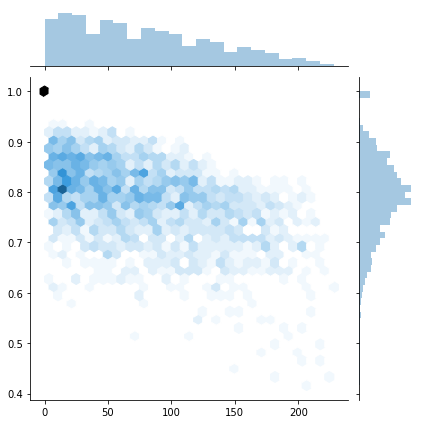

In [123]:
year_diff = np.abs(inaug_years[:,None]-inaug_years[None,:]).flatten()
sim_flat = inaug_simil.flatten()
sns.jointplot(year_diff, sim_flat, kind='hex');

In [70]:
pd.DataFrame({'pres': pres, 'mean_sim': inaug_simil.mean(axis=1)}).sort_values(by='mean_sim').head(10)

,pres,mean_sim
1,1793-Washington.txt,0.581363
39,1945-Roosevelt.txt,0.672154
19,1865-Lincoln.txt,0.689010
57,2017-Trump.txt,0.690117
53,2001-Bush.txt,0.701539
47,1977-Carter.txt,0.705981
46,1973-Nixon.txt,0.729264
51,1993-Clinton.txt,0.731789
56,2013-Obama.txt,0.747434
20,1869-Grant.txt,0.747690


In [118]:
inaug_usage = (inaug_count > 0).astype(np.int)
inaug_vocab = inaug_usage.sum(axis=1).getA1()
inaug_diver = (inaug_freq.power(2)).sum(axis=1).getA1()
stats = pd.DataFrame({'name': pres, 'year': inaug_years, 'length': inaug_length, 'vocab': inaug_vocab, 'diversity': inaug_diver})

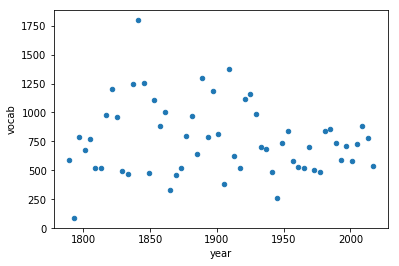

In [117]:
stats.plot.scatter('year', 'vocab');